In [23]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop, Adam
from keras.metrics import Accuracy
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

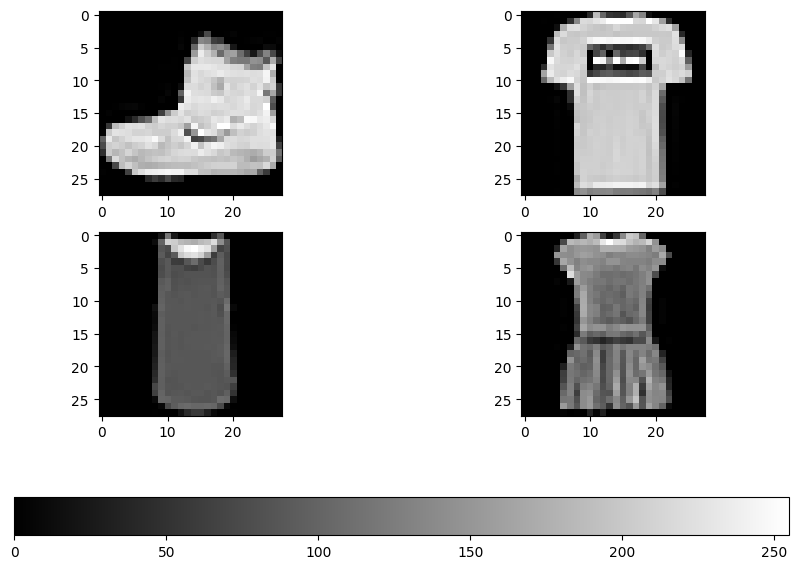

In [25]:
fig , axs = plt.subplots(2,2, figsize=(10,7))
images = []
for ax, data in zip(axs.flat, train_images):
    images.append(ax.imshow(data, cmap='gray'))
fig.colorbar(images[0], ax=axs, orientation= 'horizontal', fraction=.1)

In [26]:
print(f"images shape: {train_images.shape} and label shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape} and test label shape: {test_labels.shape}")

images shape: (60000, 28, 28) and label shape: (60000,)
test images shape: (10000, 28, 28) and test label shape: (10000,)


In [27]:
x_test_reshaped = test_images.reshape(-1,28,28,1)
x_train_reshaped = train_images.reshape(-1,28,28,1)
categorical_test_labels = keras.utils.to_categorical(test_labels)
categorical_train_labels = keras.utils.to_categorical(train_labels)

In [28]:
print(f"images shape: {x_train_reshaped.shape} and label shape: {categorical_train_labels.shape}")
print(f"images shape: {x_test_reshaped.shape} and label shape: {categorical_test_labels.shape}")

images shape: (60000, 28, 28, 1) and label shape: (60000, 10)
images shape: (10000, 28, 28, 1) and label shape: (10000, 10)


In [29]:
simple_conv_model = Sequential()
simple_conv_model.add(keras.Input(shape=(28,28,1)))
simple_conv_model.add(Conv2D(32,(3,3),activation='relu'))
simple_conv_model.add(Conv2D(64,(3,3),activation='relu'))
simple_conv_model.add(MaxPooling2D((2,2)))
simple_conv_model.add(Conv2D(128,(3,3),activation='relu'))
simple_conv_model.add(MaxPooling2D((2,2)))
simple_conv_model.add(Flatten())
simple_conv_model.add(Dense(64,activation='relu'))
simple_conv_model.add(Dropout(0.5))
simple_conv_model.add(Dense(10, activation='softmax'))

simple_conv_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,186 (1.14 MB)

 Trainable params: 298,186 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
simple_conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = simple_conv_model.fit(x_train_reshaped,categorical_train_labels, epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9638 - loss: 0.0957 - val_accuracy: 0.9202 - val_loss: 0.3909
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9697 - loss: 0.0797 - val_accuracy: 0.9220 - val_loss: 0.3975
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9721 - loss: 0.0723 - val_accuracy: 0.9206 - val_loss: 0.4458
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9740 - loss: 0.0680 - val_accuracy: 0.9212 - val_loss: 0.4578
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.9753 - loss: 0.0625 - val_accuracy: 0.9192 - val_loss: 0.4730
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.9750 - loss: 0.0628 - val_accuracy: 0.9195 - val_loss: 0.4606
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.9771 - loss: 0.0600 - val_accuracy: 0.9207 - val_loss: 0.5011
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.9767 - loss: 0.0612 - 

In [ ]:
# x_train = train_images.astype('float32')
# x_test = test_images.astype('float32')

# x_train /= 255
# x_test /= 255


In [ ]:
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim = 784))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(10, activation='softmax'))

NameError: name 'Sequential' is not defined

In [ ]:
# model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=categorical_crossentropy,optimizer=RMSprop(learning_rate=0.01), metrics=[Accuracy])

In [ ]:
print(x_train.shape)
print(categorical_train_labels.shape)
categorical_train_labels[5]
x_train[0]

(60000, 784)
(60000, 10)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
history = model.fit(x_train,categorical_train_labels,batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0015 - loss: 0.7213 - val_accuracy: 0.0062 - val_loss: 0.4985
Epoch 2/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0071 - loss: 0.4601 - val_accuracy: 0.0111 - val_loss: 0.5545
Epoch 3/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0124 - loss: 0.4208 - val_accuracy: 0.0203 - val_loss: 0.4755
Epoch 4/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0187 - loss: 0.4000 - val_accuracy: 0.0232 - val_loss: 0.4354
Epoch 5/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0272 - loss: 0.3804 - val_accuracy: 0.0376 - val_loss: 0.4335
Epoch 6/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0352 - loss: 0.3719 - val_accuracy: 0.0410 - val_loss: 0.4720
Epoch 7/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0448 - loss: 0.3604 - val_accuracy: 0.0359 - val_loss: 0.4405
Epoch 8/300
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0512 - loss: 0.3559 - val_accu

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

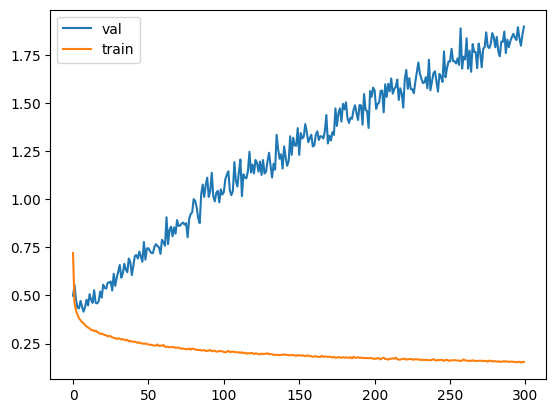

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

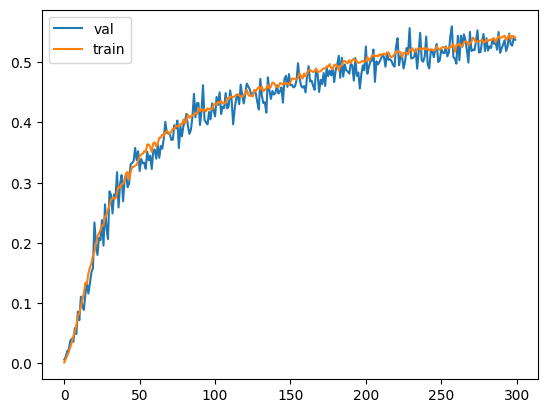

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

In [ ]:
x_test.shape
categorical_test_labels.shape
loss, acc = model.evaluate(x_test, categorical_test_labels)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5398 - loss: 1.8868

Testing loss: 1.89, acc: 0.54%


In [ ]:
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


In [ ]:
print("predicted:")
print(predicted_classes)
print("True Label:")
print(test_labels)

predicted:
[9 2 1 ... 8 1 5]
True Label:
[9 2 1 ... 8 1 5]


Text(0, 0.5, 'True label')

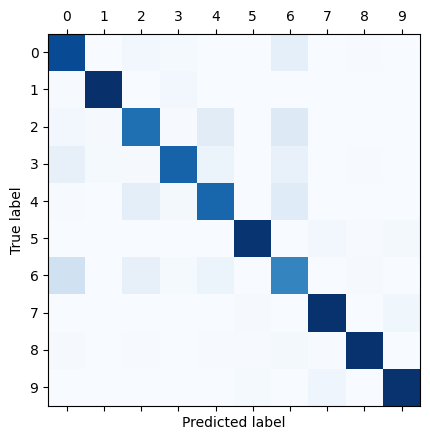

In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(test_labels, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")